In [1]:
%config IPCompleter.greedy=True
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [7]:
import os, sys, re, math, datetime as dt, pandas as pd, numpy as np, time
import logging
import matplotlib.pyplot as plt
from string import Template
from IPython.display import display, HTML

logging.basicConfig(format='%(asctime)s [%(name)s:%(lineno)d:%(funcName)s] [%(levelname)s] %(message)s', level=logging.INFO)

pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.max_colwidth', 5000)
pd.set_option('display.width', 5000)

def display_df(df):
    display(df.head(100000))
    print(df.shape)

In [8]:
import fastf1 as f1

session = f1.get_session(2023, 8, 'R')
schedule = f1.get_event_schedule(2023)
# print(session.event)
display_df(schedule)
schedule.dtypes

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session1DateUtc,Session2,Session2Date,Session2DateUtc,Session3,Session3Date,Session3DateUtc,Session4,Session4Date,Session4DateUtc,Session5,Session5Date,Session5DateUtc,F1ApiSupport
0,0,Bahrain,Sakhir,FORMULA 1 ARAMCO PRE-SEASON TESTING 2023,2023-02-25,Pre-Season Testing,testing,Practice 1,2023-02-23 10:00:00+03:00,2023-02-23 07:00:00,Practice 2,2023-02-24 10:00:00+03:00,2023-02-24 07:00:00,Practice 3,2023-02-25 10:00:00+03:00,2023-02-25 07:00:00,None,NaT,NaT,None,NaT,NaT,True
1,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2023,2023-03-05,Bahrain Grand Prix,conventional,Practice 1,2023-03-03 14:30:00+03:00,2023-03-03 11:30:00,Practice 2,2023-03-03 18:00:00+03:00,2023-03-03 15:00:00,Practice 3,2023-03-04 14:30:00+03:00,2023-03-04 11:30:00,Qualifying,2023-03-04 18:00:00+03:00,2023-03-04 15:00:00,Race,2023-03-05 18:00:00+03:00,2023-03-05 15:00:00,True
2,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2023,2023-03-19,Saudi Arabian Grand Prix,conventional,Practice 1,2023-03-17 16:30:00+03:00,2023-03-17 13:30:00,Practice 2,2023-03-17 20:00:00+03:00,2023-03-17 17:00:00,Practice 3,2023-03-18 16:30:00+03:00,2023-03-18 13:30:00,Qualifying,2023-03-18 20:00:00+03:00,2023-03-18 17:00:00,Race,2023-03-19 20:00:00+03:00,2023-03-19 17:00:00,True
3,3,Australia,Melbourne,FORMULA 1 ROLEX AUSTRALIAN GRAND PRIX 2023,2023-04-02,Australian Grand Prix,conventional,Practice 1,2023-03-31 12:30:00+10:00,2023-03-31 02:30:00,Practice 2,2023-03-31 16:00:00+10:00,2023-03-31 06:00:00,Practice 3,2023-04-01 12:30:00+10:00,2023-04-01 02:30:00,Qualifying,2023-04-01 16:00:00+10:00,2023-04-01 06:00:00,Race,2023-04-02 15:00:00+10:00,2023-04-02 05:00:00,True
4,4,Azerbaijan,Baku,FORMULA 1 AZERBAIJAN GRAND PRIX 2023,2023-04-30,Azerbaijan Grand Prix,sprint_shootout,Practice 1,2023-04-28 13:30:00+04:00,2023-04-28 09:30:00,Qualifying,2023-04-28 17:00:00+04:00,2023-04-28 13:00:00,Sprint Shootout,2023-04-29 12:30:00+04:00,2023-04-29 08:30:00,Sprint,2023-04-29 17:30:00+04:00,2023-04-29 13:30:00,Race,2023-04-30 15:00:00+04:00,2023-04-30 11:00:00,True
5,5,United States,Miami,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2023,2023-05-07,Miami Grand Prix,conventional,Practice 1,2023-05-05 14:00:00-04:00,2023-05-05 18:00:00,Practice 2,2023-05-05 17:30:00-04:00,2023-05-05 21:30:00,Practice 3,2023-05-06 12:30:00-04:00,2023-05-06 16:30:00,Qualifying,2023-05-06 16:00:00-04:00,2023-05-06 20:00:00,Race,2023-05-07 15:30:00-04:00,2023-05-07 19:30:00,True
6,6,Monaco,Monaco,FORMULA 1 GRAND PRIX DE MONACO 2023,2023-05-28,Monaco Grand Prix,conventional,Practice 1,2023-05-26 13:30:00+02:00,2023-05-26 11:30:00,Practice 2,2023-05-26 17:00:00+02:00,2023-05-26 15:00:00,Practice 3,2023-05-27 12:30:00+02:00,2023-05-27 10:30:00,Qualifying,2023-05-27 16:00:00+02:00,2023-05-27 14:00:00,Race,2023-05-28 15:00:00+02:00,2023-05-28 13:00:00,True
7,7,Spain,Barcelona,FORMULA 1 AWS GRAN PREMIO DE ESPAÑA 2023,2023-06-04,Spanish Grand Prix,conventional,Practice 1,2023-06-02 13:30:00+02:00,2023-06-02 11:30:00,Practice 2,2023-06-02 17:00:00+02:00,2023-06-02 15:00:00,Practice 3,2023-06-03 12:30:00+02:00,2023-06-03 10:30:00,Qualifying,2023-06-03 16:00:00+02:00,2023-06-03 14:00:00,Race,2023-06-04 15:00:00+02:00,2023-06-04 13:00:00,True
8,8,Canada,Montréal,FORMULA 1 PIRELLI GRAND PRIX DU CANADA 2023,2023-06-18,Canadian Grand Prix,conventional,Practice 1,2023-06-16 13:30:00-04:00,2023-06-16 17:30:00,Practice 2,2023-06-16 16:30:00-04:00,2023-06-16 20:30:00,Practice 3,2023-06-17 12:30:00-04:00,2023-06-17 16:30:00,Qualifying,2023-06-17 16:00:00-04:00,2023-06-17 20:00:00,Race,2023-06-18 14:00:00-04:00,2023-06-18 18:00:00,True
9,9,Austria,Spielberg,FORMULA 1 ROLEX GROSSER PREIS VON ÖSTERREICH 2023,2023-07-02,Austrian Grand Prix,sprint_shootout,Practice 1,2023-06-30 13:30:00+02:00,2023-06-30 11:30:00,Qualifying,2023-06-30 17:00:00+02:00,2023-06-30 15:00:00,Sprint Shootout,2023-07-01 12:00:00+02:00,2023-07-01 1

(23, 23)


RoundNumber                   int64
Country                      object
Location                     object
OfficialEventName            object
EventDate            datetime64[ns]
EventName                    object
EventFormat                  object
Session1                     object
Session1Date                 object
Session1DateUtc      datetime64[ns]
Session2                     object
Session2Date                 object
Session2DateUtc      datetime64[ns]
Session3                     object
Session3Date                 object
Session3DateUtc      datetime64[ns]
Session4                     object
Session4Date                 object
Session4DateUtc      datetime64[ns]
Session5                     object
Session5Date                 object
Session5DateUtc      datetime64[ns]
F1ApiSupport                   bool
dtype: object

In [11]:
session.load()

core           INFO 	Loading data for Canadian Grand Prix - Race [v3.1.6]
2023-12-25 22:59:57,786 [fastf1.fastf1.core:1248:load] [INFO] Loading data for Canadian Grand Prix - Race [v3.1.6]
req            INFO 	Using cached data for session_info
2023-12-25 22:59:57,789 [fastf1.fastf1.req:408:_cached_api_request] [INFO] Using cached data for session_info
req            INFO 	Using cached data for driver_info
2023-12-25 22:59:57,791 [fastf1.fastf1.req:408:_cached_api_request] [INFO] Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
2023-12-25 23:00:01,164 [fastf1.fastf1.req:408:_cached_api_request] [INFO] Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
2023-12-25 23:00:01,166 [fastf1.fastf1.req:408:_cached_api_request] [INFO] Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
2023-12-25 23:00:01,168 [fastf1.fastf1.req:408:_cached_api_request] [INFO] Using

In [15]:
session.laps.info()

<class 'fastf1.core.Laps'>
RangeIndex: 1317 entries, 0 to 1316
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                1317 non-null   timedelta64[ns]
 1   Driver              1317 non-null   object         
 2   DriverNumber        1317 non-null   object         
 3   LapTime             1314 non-null   timedelta64[ns]
 4   LapNumber           1317 non-null   float64        
 5   Stint               1317 non-null   float64        
 6   PitOutTime          33 non-null     timedelta64[ns]
 7   PitInTime           34 non-null     timedelta64[ns]
 8   Sector1Time         1296 non-null   timedelta64[ns]
 9   Sector2Time         1316 non-null   timedelta64[ns]
 10  Sector3Time         1314 non-null   timedelta64[ns]
 11  Sector1SessionTime  1293 non-null   timedelta64[ns]
 12  Sector2SessionTime  1316 non-null   timedelta64[ns]
 13  Sector3SessionTime  1314 non-null   timedelt

In [24]:
print(session.laps.Driver.unique())
print(len(session.laps.Driver.unique()))

print(session.laps.Team.unique())
print(len(session.laps.Team.unique()))

print(session.laps.DriverNumber.unique())
print(len(session.laps.DriverNumber.unique()))

print(session.laps.Compound.unique())
print(len(session.laps.Compound.unique()))

['VER' 'GAS' 'PER' 'ALO' 'LEC' 'STR' 'SAR' 'MAG' 'DEV' 'TSU' 'ALB' 'ZHO'
 'HUL' 'OCO' 'NOR' 'HAM' 'SAI' 'RUS' 'BOT' 'PIA']
20
['Red Bull Racing' 'Alpine' 'Aston Martin' 'Ferrari' 'Williams'
 'Haas F1 Team' 'AlphaTauri' 'Alfa Romeo' 'McLaren' 'Mercedes']
10
['1' '10' '11' '14' '16' '18' '2' '20' '21' '22' '23' '24' '27' '31' '4'
 '44' '55' '63' '77' '81']
20
['MEDIUM' 'HARD' 'SOFT']
3


In [27]:
print(session.laps.Compound.value_counts())
print(session.laps.TrackStatus.value_counts())

Compound
HARD      922
MEDIUM    383
SOFT       12
Name: count, dtype: int64
TrackStatus
1      1131
4        76
2        61
24       19
26       10
67       10
267       9
Name: count, dtype: int64


In [29]:
display(session.laps.describe())

,Time,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,TyreLife,LapStartTime,LapStartDate,Position
count,1317,1314,1317.000000,1317.000000,33,34,1296,1316,1314,1293,1316,1314,1048.000000,1316.000000,1282.000000,1316.000000,1317.000000,1317,1316,1316.000000
mean,0 days 01:50:56.989881548,0 days 00:01:21.402331050,34.899772,2.079727,0 days 01:40:27.353454545,0 days 01:41:05.323088235,0 days 00:00:22.573133487,0 days 00:00:26.016532674,0 days 00:00:32.696929984,0 days 01:50:41.932526682,0 days 01:50:26.020733282,0 days 01:50:59.043652207,243.312023,270.588906,279.420437,303.231763,16.804100,0 days 01:49:35.519591495,2023-06-18 18:50:37.318670080,9.916413
min,0 days 01:03:28.836000,0 days 00:01:14.481000,1.000000,1.000000,0 days 01:03:56.492000,0 days 01:03:32.868000,0 days 00:00:20.627000,0 days 00:00:23.762000,0 days 00:00:30.086000,0 days 01:03:50.522000,0 days 01:02:57.649000,0 days 01:03:28.914000,86.000000,56.000000,120.000000,82.000000,1.000000,0 days 01:02:05.478000,2023-06-18 18:03:05.484000,1.000000
25%,0 days 01:28:24.901000,0 days 00:01:17.019500,17.000000,1.000000,0 days 01:18:37.570000,0 days 01:18:14.074250,0 days 00:00:21.474000,0 days 00:00:24.613750,0 days 00:00:30.862000,0 days 01:28:45.421000,0 days 01:28:42.793500,0 days 01:29:30.744000,246.000000,275.000000,278.000000,303.000000,7.000000,0 days 01:27:04.888000,2023-06-18 18:28:56.480499968,5.000000
50%,0 days 01:51:36.175000,0 days 00:01:17.678000,35.000000,2.000000,0 days 01:48:22.976000,0 days 01:48:35.241500,0 days 00:00:21.734000,0 days 00:00:24.813000,0 days 00:00:31.082000,0 days 01:51:20.529000,0 days 01:51:08.816000,0 days 01:51:40.163000,251.000000,278.000000,281.000000,308.000000,14.000000,0 days 01:50:18.433000,2023-06-18 18:51:22.179000064,10.000000
75%,0 days 02:14:05.045000,0 days 00:01:18.702250,52.000000,3.000000,0 days 01:54:45.782000,0 days 01:55:03.531750,0 days 00:00:22.180750,0 days 00:00:25.170250,0 days 00:00:31.314750,0 days 02:13:24.219000,0 days 02:13:34.669500,0 days 02:14:03.920000,255.000000,280.000000,287.000000,322.000000,24.000000,0 days 02:12:48.139000,2023-06-18 19:13:48.645750016,15.000000
max,0 days 02:37:19.071000,0 days 00:02:29.911000,70.000000,3.000000,0 days 02:34:20.943000,0 days 02:33:57.725000,0 days 00:01:20.397000,0 days 00:00:56.572000,0 days 00:01:08.951000,0 days 02:36:23.689000,0 days 02:36:48.218000,0 days 02:37:19.063000,261.000000,286.000000,301.000000,343.000000,68.000000,0 days 02:36:02.292000,2023-06-18 19:37:02.298000,20.000000
std,0 days 00:27:12.896855144,0 days 00:00:11.742784522,20.119453,0.772154,0 days 00:22:18.985400350,0 days 00:22:52.970680504,0 days 00:00:03.322218430,0 days 00:00:04.578087144,0 days 00:00:05.601986570,0 days 00:26:50.193135522,0 days 00:27:13.851670169,0 days 00:27:12.072819317,27.477506,28.286323,18.091544,40.089124,12.273029,0 days 00:27:17.222857963,NaN,5.447349


In [35]:
max_df = session.laps[session.laps.Driver=="VER"]

In [36]:
max_df.describe()

,Time,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,TyreLife,LapStartTime,LapStartDate,Position
count,70,70,70.000000,70.000000,2,2,69,70,70,69,70,70,50.000000,70.000000,68.000000,70.000000,70.000000,70,70,70.0
mean,0 days 01:51:13.195471428,0 days 00:01:20.547828571,35.500000,2.228571,0 days 01:39:24.431000,0 days 01:39:00.642500,0 days 00:00:22.212246376,0 days 00:00:25.755442857,0 days 00:00:32.515771428,0 days 01:50:56.409043478,0 days 01:50:40.680700,0 days 01:51:13.196585714,238.740000,265.957143,274.602941,295.514286,13.557143,0 days 01:49:52.643671428,2023-06-18 18:50:52.649671424,1.0
min,0 days 01:03:28.836000,0 days 00:01:15.594000,1.000000,1.000000,0 days 01:18:13.899000,0 days 01:17:50.274000,0 days 00:00:20.979000,0 days 00:00:24.048000,0 days 00:00:30.128000,0 days 01:03:50.522000,0 days 01:02:57.649000,0 days 01:03:28.914000,89.000000,113.000000,161.000000,93.000000,1.000000,0 days 01:02:05.478000,2023-06-18 18:03:05.484000,1.0
25%,0 days 01:29:49.509500,0 days 00:01:16.094750,18.250000,2.000000,0 days 01:28:49.165000,0 days 01:28:25.458250,0 days 00:00:21.164000,0 days 00:00:24.266750,0 days 00:00:30.642750,0 days 01:29:51.590000,0 days 01:29:18.593000,0 days 01:29:49.509500,244.000000,270.250000,276.000000,301.250000,6.250000,0 days 01:28:32.840500,2023-06-18 18:29:32.846500096,1.0
50%,0 days 01:51:55.466500,0 days 00:01:16.796000,35.500000,2.000000,0 days 01:39:24.431000,0 days 01:39:00.642500,0 days 00:00:21.296000,0 days 00:00:24.515000,0 days 00:00:30.926000,0 days 01:51:38.644000,0 days 01:51:24.404000,0 days 01:51:55.466500,251.000000,273.000000,278.000000,302.000000,12.000000,0 days 01:50:37.971500,2023-06-18 18:51:37.977500160,1.0
75%,0 days 02:14:13.934500,0 days 00:01:17.337500,52.750000,3.000000,0 days 01:49:59.697000,0 days 01:49:35.826750,0 days 00:00:21.532000,0 days 00:00:24.699500,0 days 00:00:31.065750,0 days 02:13:38.215000,0 days 02:13:43.373000,0 days 02:14:13.934500,254.750000,276.000000,280.000000,304.000000,20.750000,0 days 02:12:58.138250,2023-06-18 19:13:58.144249856,1.0
max,0 days 02:36:04.104000,0 days 00:02:29.911000,70.000000,3.000000,0 days 02:00:34.963000,0 days 02:00:11.011000,0 days 00:00:42.511000,0 days 00:00:56.572000,0 days 00:01:08.951000,0 days 02:35:09.041000,0 days 02:35:33.296000,0 days 02:36:04.104000,258.000000,280.000000,294.000000,330.000000,30.000000,0 days 02:34:47.867000,2023-06-18 19:35:47.873000,1.0
std,0 days 00:27:13.523481915,0 days 00:00:13.365244783,20.351085,0.725747,0 days 00:29:56.803585829,0 days 00:29:56.572361911,0 days 00:00:03.415456874,0 days 00:00:05.166525215,0 days 00:00:06.042112422,0 days 00:26:51.210918105,0 days 00:27:15.123165800,0 days 00:27:13.521499740,35.457828,29.729425,18.935980,36.489722,8.472694,0 days 00:27:17.926299240,NaN,0.0


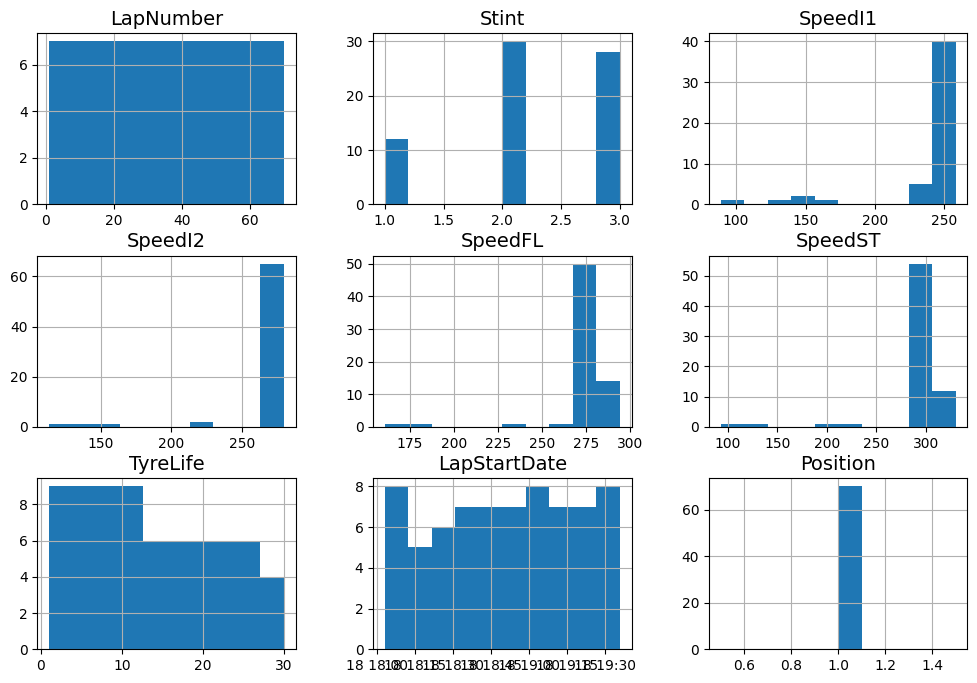

In [33]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

max_df.hist(bins=10, figsize=(12, 8))
# save_fig("attribute_histogram_plots")  # extra code
plt.show()

In [38]:
session.laps.pick_driver("VER").info()

<class 'fastf1.core.Laps'>
Index: 70 entries, 0 to 69
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                70 non-null     timedelta64[ns]
 1   Driver              70 non-null     object         
 2   DriverNumber        70 non-null     object         
 3   LapTime             70 non-null     timedelta64[ns]
 4   LapNumber           70 non-null     float64        
 5   Stint               70 non-null     float64        
 6   PitOutTime          2 non-null      timedelta64[ns]
 7   PitInTime           2 non-null      timedelta64[ns]
 8   Sector1Time         69 non-null     timedelta64[ns]
 9   Sector2Time         70 non-null     timedelta64[ns]
 10  Sector3Time         70 non-null     timedelta64[ns]
 11  Sector1SessionTime  69 non-null     timedelta64[ns]
 12  Sector2SessionTime  70 non-null     timedelta64[ns]
 13  Sector3SessionTime  70 non-null     timedelta64[ns]
 

In [39]:
session.laps.pick_driver("VER").pick_laps([1,70]).info()

<class 'fastf1.core.Laps'>
Index: 2 entries, 0 to 69
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                2 non-null      timedelta64[ns]
 1   Driver              2 non-null      object         
 2   DriverNumber        2 non-null      object         
 3   LapTime             2 non-null      timedelta64[ns]
 4   LapNumber           2 non-null      float64        
 5   Stint               2 non-null      float64        
 6   PitOutTime          0 non-null      timedelta64[ns]
 7   PitInTime           0 non-null      timedelta64[ns]
 8   Sector1Time         1 non-null      timedelta64[ns]
 9   Sector2Time         2 non-null      timedelta64[ns]
 10  Sector3Time         2 non-null      timedelta64[ns]
 11  Sector1SessionTime  1 non-null      timedelta64[ns]
 12  Sector2SessionTime  2 non-null      timedelta64[ns]
 13  Sector3SessionTime  2 non-null      timedelta64[ns]
 1

In [44]:
max_1_car = session.laps.pick_driver("VER").pick_laps([1]).get_car_data()

In [47]:
max_1_car.describe()

,Date,RPM,Speed,nGear,Throttle,DRS,Time,SessionTime
count,323,323.000000,323.000000,323.000000,323.000000,323.0,323,323
mean,2023-06-18 18:03:47.318690304,9881.489164,188.402477,4.733746,66.501548,1.0,0 days 00:00:41.834690402,0 days 01:02:47.312690402
min,2023-06-18 18:03:05.824000,4203.000000,0.000000,1.000000,0.000000,1.0,0 days 00:00:00.340000,0 days 01:02:05.818000
25%,2023-06-18 18:03:26.344000,8924.500000,129.000000,3.000000,16.000000,1.0,0 days 00:00:20.860000,0 days 01:02:26.338000
50%,2023-06-18 18:03:47.024000,10557.000000,195.000000,5.000000,100.000000,1.0,0 days 00:00:41.540000,0 days 01:02:47.018000
75%,2023-06-18 18:04:07.864000,11072.000000,253.500000,6.000000,100.000000,1.0,0 days 00:01:02.380000,0 days 01:03:07.858000
max,2023-06-18 18:04:28.824000,11871.000000,301.000000,8.000000,100.000000,1.0,0 days 00:01:23.340000,0 days 01:03:28.818000
std,NaN,1622.409822,72.109813,1.885794,42.699177,0.0,0 days 00:00:24.153435958,0 days 00:00:24.153435958


In [52]:
circuit_corners = session.get_circuit_info().corners
circuit_corners

,X,Y,Number,Letter,Angle,Distance
0,3314.213623,-1317.854858,1,,-165.704223,225.743213
1,3856.566650,-2073.488770,2,,-22.292629,320.624280
2,740.000488,-608.991943,3,,-158.882111,693.206801
3,746.362305,-42.993057,4,,10.981968,750.568160
4,-724.044739,1618.967407,5,,29.699708,967.507804
5,-993.916626,3790.888672,6,,27.681895,1198.245481
6,-1783.871460,4016.300781,7,,-117.805015,1292.609426
7,-1785.440430,10539.706055,8,,118.593733,1972.048065
8,-1140.291992,10976.314453,9,,-28.305198,2047.220648
9,-711.505371,16759.564453,10,,97.796495,2643.216507


In [54]:
circuit_marshal_lights = session.get_circuit_info().marshal_lights
circuit_marshal_lights

# corners, marshal_lights and marshal_sectors

,X,Y,Number,Letter,Angle,Distance
0,3353.000000,920.000000,1,,12.894578,0.682865
1,3498.902832,-2272.346680,2,,-88.329898,365.720691
2,1662.266968,-1507.206299,3,,-128.275662,576.909088
3,677.248352,125.601845,4,,28.002159,769.287581
4,-774.033936,1715.084595,5,,-158.158475,988.521463
5,-924.534241,3112.103760,6,,-3.283047,1137.921266
6,-2157.230957,4442.897949,7,,-157.394992,1354.285855
7,-2445.885254,7373.739258,8,,178.795246,1647.381074
8,-2088.798096,9766.385742,9,,166.308876,1889.662640
9,-975.051697,11434.003906,10,,-14.753597,2090.568299


In [55]:
circuit_marshal_sectors = session.get_circuit_info().marshal_sectors
circuit_marshal_sectors

,X,Y,Number,Letter,Angle,Distance
0,3353.000000,920.000000,1,,12.449547,0.682865
1,3515.829834,-2271.817871,2,,-88.066845,365.720691
2,1691.748535,-1529.987549,3,,-127.796402,576.909088
3,610.779236,219.528168,4,,38.205092,769.287581
4,-800.530701,1781.093994,5,,-158.226301,988.521463
5,-924.145569,3118.867188,6,,-3.327263,1137.921266
6,-2150.709229,4427.268555,7,,-157.350991,1344.908187
7,-2446.911377,7329.717773,8,,178.768374,1647.381074
8,-2148.736084,9516.055664,9,,166.635973,1870.927243
9,-992.291138,11368.494141,10,,-14.678034,2090.568299


In [60]:
circuit = pd.concat([circuit_corners, circuit_marshal_lights, circuit_marshal_sectors])

In [61]:
circuit

,X,Y,Number,Letter,Angle,Distance
0,3314.213623,-1317.854858,1,,-165.704223,225.743213
1,3856.566650,-2073.488770,2,,-22.292629,320.624280
2,740.000488,-608.991943,3,,-158.882111,693.206801
3,746.362305,-42.993057,4,,10.981968,750.568160
4,-724.044739,1618.967407,5,,29.699708,967.507804
5,-993.916626,3790.888672,6,,27.681895,1198.245481
6,-1783.871460,4016.300781,7,,-117.805015,1292.609426
7,-1785.440430,10539.706055,8,,118.593733,1972.048065
8,-1140.291992,10976.314453,9,,-28.305198,2047.220648
9,-711.505371,16759.564453,10,,97.796495,2643.216507


In [62]:
import plotly.express as px
fig = px.scatter(circuit, x='X', y="Y")
fig.show()

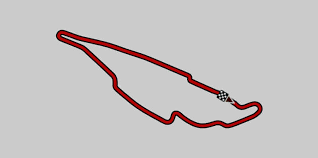

In [77]:
circuit_max = session.laps.pick_driver("VER").pick_laps([1]).get_pos_data()

In [78]:
def _rotate_from_origin(x, y, theta):
    return x * np.cos(theta) - y * np.sin(theta), x * np.sin(theta) + y * np.cos(theta)

In [79]:
x_trans = []
y_trans = []

theta = 315
for index, row in circuit_max.iterrows():
    x, y = _rotate_from_origin(row.X, row.Y, theta)
    x_trans.append(x)
    y_trans.append(y)


In [81]:
# fig = px.scatter(circuit_max, x='X', y="Y")
fig = px.scatter(x=x_trans, y=y_trans)

fig.update_layout(
    width = 600,
    height = 750,
    title = "fixed-ratio axes"
)
fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
  )

fig.show()

In [83]:
session.drivers

['1',
 '14',
 '44',
 '16',
 '55',
 '11',
 '23',
 '31',
 '18',
 '77',
 '81',
 '10',
 '4',
 '22',
 '27',
 '24',
 '20',
 '21',
 '63',
 '2']

In [95]:
session.get_driver('ALB')

DriverNumber                                                                                                                                 23
BroadcastName                                                                                                                           A ALBON
Abbreviation                                                                                                                                ALB
DriverId                                                                                                                                  albon
TeamName                                                                                                                               Williams
TeamColor                                                                                                                                37BEDD
TeamId                                                                                                                                 w

In [93]:
session.get_driver('Max Verstappen')

ValueError: Invalid driver identifier 'Max Verstappen'

In [ ]:
session.